# MEA 540 
**Thermal Wind HW Solution**

A form of the potential temperature ($\theta$) structure for the Gulf Stream after separation from Cape Hatteras is that it is linear in the meridional direction ($y$) and exponential in the vertical ($z$) with the following form
\begin{equation}
\theta(y,z) = (\theta_o + \Gamma y)e^{z/h}
\end{equation}
where $\theta_o$ = 20$^{\circ}$C is a constant surface temperature at the core of the jet ($y=0$), $\Gamma = -10^{\circ}\mbox{C}/100~\mbox{km}$ is a constant meridional temperature gradient, $h$ is the scale depth to be determined, and there is no zonal dependence.  It is assumed that the density field follows the simple equation of state in the class lecture with a thermal expansion coefficient ($\alpha_{\theta}$) equal to 2$\times$10$^{-4}$ $^{\circ}$C$^{-1}$ and a reference density ($\rho_o$) equal to 1025 kg m$^{-3}$.

1. Use the concept of thermal wind to derive a symbolic expression for the zonal vertical shear ($\partial u/\partial z$).
2. Use the expression from (a) to determine the sign and magnitude of the zonal vertical shear at the sea surface ($z=0$) in units of s$^{-1}$.
3. Use the expression from (a) to show that the zonal current, $u(z)$, has the following form:
\begin{equation}
u(z) = u_o + \frac{\alpha_{\theta}g}{f}\Gamma h(1-e^{z/h})
\end{equation}
where $u_o$ is a constant surface velocity.  \textbf{Hint}: Vertically-integrate from an arbitrary depth ($z$) to the surface, $\displaystyle\int^0_z (a)\mathrm{d}z^{\prime}$.
4. Determine what the vertical scale depth $h$ should be in units of meters if the zonal current vanishes at $z=-h$ with $u_o = 2$ m s$^{-1}$.
5. Use your favorite plotting software to plot $u$ vs. $z$ in m s$^{-1}$ from $z$ = -1000 m to the surface and comment on why there is no y-dependence.



In [4]:
# Import Modules
import matplotlib.pyplot as plt
import numpy as np
import warnings, sys
warnings.filterwarnings('ignore')

In [5]:
# Jet parameters
alpha = 2.e-4 # C^-1
g = 9.81  # m s^-2
phi = 35.  # Latitude
f = 2.*7.29e-5*np.sin(phi*np.pi/180.)  # s^-1
u_o = 2.  # m s^-1
To = 20.  # C
Ty = -10./100. # C km^-1

In [14]:
# Scale depth
h = -f/(alpha*g)*u_o/Ty/(1-np.exp(-1))*1.e3  # m
print(str(h) + ' meters')

1348.5898993620951 meters


In [7]:
# Temperature array
y = np.arange(-100, 100)
z = np.arange(-1000, 1)
Y, Z = np.meshgrid(y, z)
T = (To+Ty*Y)*np.exp(Z/h)  # Linear in y
T

array([[14.29174523, 14.24410608, 14.19646693, ...,  4.90683253,
         4.85919338,  4.81155423],
       [14.30234671, 14.25467222, 14.20699773, ...,  4.91047237,
         4.86279788,  4.81512339],
       [14.31295605, 14.2652462 , 14.21753634, ...,  4.91411491,
         4.86640506,  4.8186952 ],
       ...,
       [29.95554206, 29.85569025, 29.75583844, ..., 10.28473611,
        10.1848843 , 10.08503249],
       [29.97776279, 29.87783691, 29.77791104, ..., 10.29236522,
        10.19243935, 10.09251347],
       [30.        , 29.9       , 29.8       , ..., 10.3       ,
        10.2       , 10.1       ]])

Text(0.5, 1.0, 'Surface Temperature')

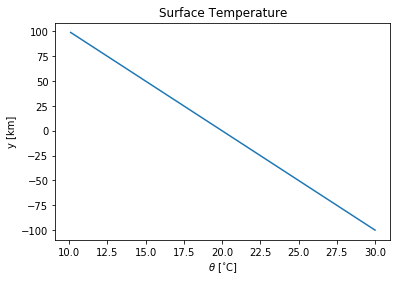

In [8]:
# Plot of surface temperature across the jet
plt.plot(T[-1, :], y)
plt.xlabel('$\\theta$ [$^{\circ}$C]')
plt.ylabel('y [km]')
plt.title('Surface Temperature')

Text(0, 0.5, 'z [m]')

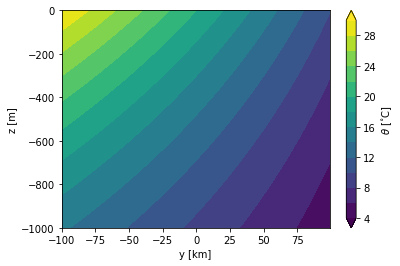

In [9]:
clev = np.arange(4, 32, 2)
plt.contourf(Y, Z, T, levels=clev, extend='both')
cbar = plt.colorbar()
cbar.set_label('$\\theta$ [$^{\circ}$C]')
plt.xlabel('y [km]')
plt.ylabel('z [m]')

In [10]:
# Zonal velocity from thermal wind
u = u_o + alpha*g/f*Ty*h*(1-np.exp(Z/h))/1.e3  # m s^-1
u

array([[0.34332712, 0.34332712, 0.34332712, ..., 0.34332712, 0.34332712,
        0.34332712],
       [0.34444521, 0.34444521, 0.34444521, ..., 0.34444521, 0.34444521,
        0.34444521],
       [0.34556412, 0.34556412, 0.34556412, ..., 0.34556412, 0.34556412,
        0.34556412],
       ...,
       [1.99531124, 1.99531124, 1.99531124, ..., 1.99531124, 1.99531124,
        1.99531124],
       [1.99765475, 1.99765475, 1.99765475, ..., 1.99765475, 1.99765475,
        1.99765475],
       [2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ]])

Text(0.5, 0, 'u [m s$^{-1}$]')

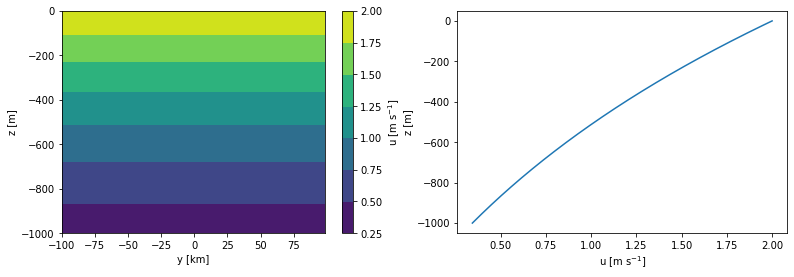

In [12]:
# Figure of jet cross-stream and vertical structure
plt.rcParams['figure.figsize'] = 13, 9
plt.subplot(2, 2, 1)
plt.contourf(Y, Z, u)
cbar = plt.colorbar()
cbar.set_label('u [m s$^{-1}$]')
plt.xlabel('y [km]')
plt.ylabel('z [m]')

plt.subplot(2, 2, 2)
plt.plot(u[:, 0], z)
plt.ylabel('z [m]')
plt.xlabel('u [m s$^{-1}$]')

e) The zonal velocity has an expoential vertical structur with no y-depdendence in this baroclinic flow.  Since the temperature field is linear in y, there is no y-dependence in the velocity field.  You need higher order structure for the velocity to have y-dependece.  In reality the Gulf Stream has a y-structure that is reminiscent of a hyperbolic tangent function (same as for sea surface height see HW1 and HW2).  This leads to the velocity having a laterial structure in y.  